# Multiple Linear Regression

## Importing the libraries

In [ ]:
# ================================
# Import Required Libraries
# ================================

# 1) NumPy
# Used for numerical operations and working with arrays
import numpy as np

# 2) Pandas
# Used for importing datasets and creating:
#    - Feature matrix (X)
#    - Dependent variable vector (y)
import pandas as pd

# 3) Matplotlib
# Used for data visualization (we mainly use pyplot module)
import matplotlib.pyplot as plt


## Importing the dataset

In [ ]:
# =========================================
# Load the Dataset
# =========================================

# Load the "50_Startups.csv" dataset into a pandas DataFrame
dataset = pd.read_csv('50_Startups.csv')

# =========================================
# Step 2: Create Feature Matrix and Target Vector
# =========================================

# 1) Feature Matrix (X)
#    - These are the independent variables used to predict the target.
#    - Usually all columns except the last one
x = dataset.iloc[:, :-1].values

# 2) Target Vector (y)
#    - This is the dependent variable we want to predict
#    - Usually the last column of the dataset
y = dataset.iloc[:, -1].values


In [ ]:
print(x)

[[165349.2 136897.8 471784.1 'New York']
 [162597.7 151377.59 443898.53 'California']
 [153441.51 101145.55 407934.54 'Florida']
 [144372.41 118671.85 383199.62 'New York']
 [142107.34 91391.77 366168.42 'Florida']
 [131876.9 99814.71 362861.36 'New York']
 [134615.46 147198.87 127716.82 'California']
 [130298.13 145530.06 323876.68 'Florida']
 [120542.52 148718.95 311613.29 'New York']
 [123334.88 108679.17 304981.62 'California']
 [101913.08 110594.11 229160.95 'Florida']
 [100671.96 91790.61 249744.55 'California']
 [93863.75 127320.38 249839.44 'Florida']
 [91992.39 135495.07 252664.93 'California']
 [119943.24 156547.42 256512.92 'Florida']
 [114523.61 122616.84 261776.23 'New York']
 [78013.11 121597.55 264346.06 'California']
 [94657.16 145077.58 282574.31 'New York']
 [91749.16 114175.79 294919.57 'Florida']
 [86419.7 153514.11 0.0 'New York']
 [76253.86 113867.3 298664.47 'California']
 [78389.47 153773.43 299737.29 'New York']
 [73994.56 122782.75 303319.26 'Florida']
 [67532

In [ ]:
print(y)

[192261.83 191792.06 191050.39 182901.99 166187.94 156991.12 156122.51
 155752.6  152211.77 149759.96 146121.95 144259.4  141585.52 134307.35
 132602.65 129917.04 126992.93 125370.37 124266.9  122776.86 118474.03
 111313.02 110352.25 108733.99 108552.04 107404.34 105733.54 105008.31
 103282.38 101004.64  99937.59  97483.56  97427.84  96778.92  96712.8
  96479.51  90708.19  89949.14  81229.06  81005.76  78239.91  77798.83
  71498.49  69758.98  65200.33  64926.08  49490.75  42559.73  35673.41
  14681.4 ]


## Encoding categorical data

In [ ]:
# =========================================
# Encoding Categorical Data (State)
# =========================================

# We use two main preprocessing classes:
# 1) ColumnTransformer → to apply transformations on specific columns
# 2) OneHotEncoder     → to convert categorical values into numerical vectors

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# =========================================
# Create ColumnTransformer Object
# =========================================
# ('encoder', OneHotEncoder(), [3])
# - 'encoder'         → name of the transformation
# - OneHotEncoder()   → encoding technique to convert categorical data into dummy variables
# - [3]               → column index that contains the categorical data (State)
# remainder='passthrough'
# → keep all other columns unchanged (numerical features)

ct = ColumnTransformer(
    transformers=[
        ('encoder', OneHotEncoder(), [3])
    ],
    remainder='passthrough'
)

# =========================================
# Apply Encoding
# =========================================
# fit_transform() does two steps:
# 1) fit()      → learn unique categories in the column
# 2) transform()→ convert categories into one-hot encoded vectors

x = np.array(ct.fit_transform(x))


In [ ]:
print(x)

[[0.0 0.0 1.0 165349.2 136897.8 471784.1]
 [1.0 0.0 0.0 162597.7 151377.59 443898.53]
 [0.0 1.0 0.0 153441.51 101145.55 407934.54]
 [0.0 0.0 1.0 144372.41 118671.85 383199.62]
 [0.0 1.0 0.0 142107.34 91391.77 366168.42]
 [0.0 0.0 1.0 131876.9 99814.71 362861.36]
 [1.0 0.0 0.0 134615.46 147198.87 127716.82]
 [0.0 1.0 0.0 130298.13 145530.06 323876.68]
 [0.0 0.0 1.0 120542.52 148718.95 311613.29]
 [1.0 0.0 0.0 123334.88 108679.17 304981.62]
 [0.0 1.0 0.0 101913.08 110594.11 229160.95]
 [1.0 0.0 0.0 100671.96 91790.61 249744.55]
 [0.0 1.0 0.0 93863.75 127320.38 249839.44]
 [1.0 0.0 0.0 91992.39 135495.07 252664.93]
 [0.0 1.0 0.0 119943.24 156547.42 256512.92]
 [0.0 0.0 1.0 114523.61 122616.84 261776.23]
 [1.0 0.0 0.0 78013.11 121597.55 264346.06]
 [0.0 0.0 1.0 94657.16 145077.58 282574.31]
 [0.0 1.0 0.0 91749.16 114175.79 294919.57]
 [0.0 0.0 1.0 86419.7 153514.11 0.0]
 [1.0 0.0 0.0 76253.86 113867.3 298664.47]
 [0.0 0.0 1.0 78389.47 153773.43 299737.29]
 [0.0 1.0 0.0 73994.56 122782.75 3

## Splitting the dataset into the Training set and Test set

In [ ]:
# =========================================
# Split the Dataset into Training and Test Sets
# =========================================

# Import train_test_split from sklearn
from sklearn.model_selection import train_test_split

# Split the dataset into:
# - X_train → Features used for training the model
# - X_test  → Features used for testing the model
# - y_train → Target values for training
# - y_test  → Target values for testing

# test_size=0.2  → 20% of the data will be used for testing
# random_state=0 → Ensures reproducibility (same split every time)
x_train, x_test, y_train, y_test = train_test_split(
    x, y,
    test_size=0.2,
    random_state=0
)


## Training the Multiple Linear Regression model on the Training set

In [ ]:
# =========================================
# Training the Multiple Linear Regression Model
# =========================================

# Import LinearRegression class from sklearn
from sklearn.linear_model import LinearRegression

# Create the Linear Regression object
regressor = LinearRegression()

# Fit (train) the model on the training set
# X_train → Independent variables (features)
# y_train → Dependent variable (target)
regressor.fit(x_train, y_train)


LinearRegression()

## Predicting the Test set results

In [ ]:
# =========================================
# Predict the target values for the test set
# =========================================
y_pred = regressor.predict(x_test)
# - regressor: the trained Multiple Linear Regression model
# - X_test: features from the test set
# - y_pred: predicted target values (profits in this case)

# =========================================
# Set print precision to 2 decimal places
# =========================================
np.set_printoptions(precision=2)
# - Ensures that when we print arrays, numbers appear with 2 decimal places
# - This does NOT affect the calculations, only the display

# =========================================
# Compare predicted vs actual target values
# =========================================
print(
    np.concatenate(
        (
            y_pred.reshape(len(y_pred), 1),  # reshape predictions into a column vector
            y_test.reshape(len(y_test), 1)   # reshape actual values into a column vector
        ),
        axis=1  # concatenate along columns (side by side)
    )
)
# - Result is a 2D array:
#     Column 1 → Predicted values
#     Column 2 → Actual values
# - Makes it easy to visually compare predictions with real target values


[[103015.2  103282.38]
 [132582.28 144259.4 ]
 [132447.74 146121.95]
 [ 71976.1   77798.83]
 [178537.48 191050.39]
 [116161.24 105008.31]
 [ 67851.69  81229.06]
 [ 98791.73  97483.56]
 [113969.44 110352.25]
 [167921.07 166187.94]]


## Visualising Actual vs Predicted Profits

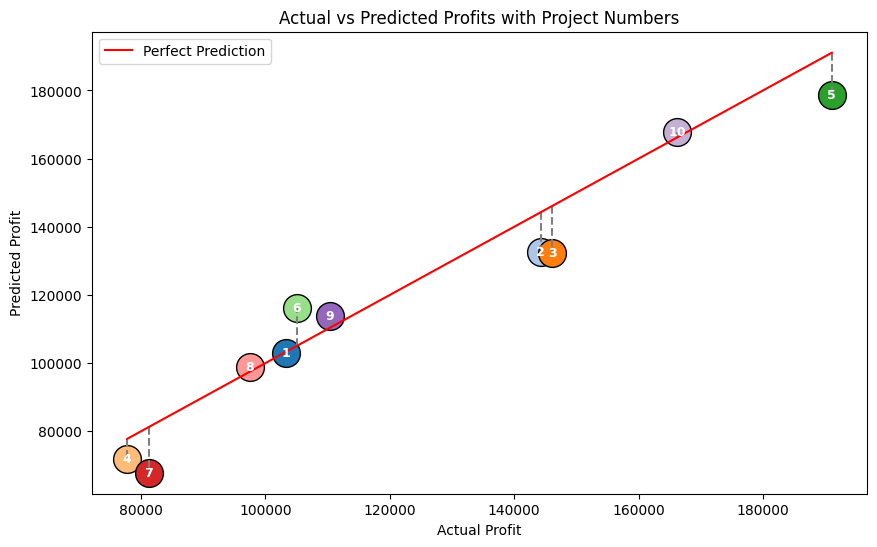

In [ ]:
# =========================================
# Visualising Actual vs Predicted Profits
# =========================================

# This plot compares predicted profits (y_pred) with actual profits (y_test)
# - Each point represents a project
# - Same color for actual vs predicted of each project
# - Gray dashed line shows the difference/error for each project
# - Project number is shown inside the circle
# - Red line y = x represents perfect prediction (predicted = actual)

# Number of projects (points)
n_points = len(y_test)

# Generate a colormap (tab20 can handle up to 20 distinct colors)
colors = plt.cm.tab20(range(n_points))

plt.figure(figsize=(10, 6))

# Plot each point with its own color and draw a line connecting actual vs predicted
for i in range(n_points):
    # Scatter point: actual vs predicted
    plt.scatter(y_test[i], y_pred[i], color=colors[i], s=400, edgecolor='black')  # s=400 for bigger circle, edgecolor for visibility

    # Draw a vertical line connecting the actual value to the predicted value
    plt.plot([y_test[i], y_test[i]], [y_test[i], y_pred[i]], color='gray', linestyle='--')

    # Add project number inside the circle
    plt.text(y_test[i], y_pred[i], str(i+1), fontsize=9, ha='center', va='center', color='white', weight='bold')

# Plot the perfect prediction line y = x
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='-', label='Perfect Prediction')

# Add labels, title, and legend
plt.xlabel("Actual Profit")
plt.ylabel("Predicted Profit")
plt.title("Actual vs Predicted Profits with Project Numbers")
plt.legend()
plt.show()


This plot shows a comparison between the **predicted profits (`y_pred`)** and the **actual profits (`y_test`)** for each project in the test set.  
## Key points to notice:
- Each point represents a project.  
- Same color is used for each project to make it easy to identify.  
- Gray dashed lines connect the actual and predicted values for each project (the longer the line, the bigger the error).  
- Project numbers are displayed inside the circles.  
- The red line (`y = x`) represents perfect prediction — points on this line mean the model predicted exactly right.  

This visualisation helps you quickly see which projects the model predicted well and which ones it struggled with.


## Error Analysis: Predicted vs Actual Profits

In [ ]:
# =========================================
# Create a comparison table for projects
# =========================================

# Calculate differences
diff = y_pred - y_test

# Create a DataFrame
comparison_df = pd.DataFrame({
    "Project": range(1, n_points+1),
    "Actual Profit": y_test,
    "Predicted Profit": y_pred,
    "Difference": diff
})

# Display the table
comparison_df


,Project,Actual Profit,Predicted Profit,Difference
0,1,103282.38,103015.201598,-267.178402
1,2,144259.40,132582.277608,-11677.122392
2,3,146121.95,132447.738452,-13674.211548
3,4,77798.83,71976.098513,-5822.731487
4,5,191050.39,178537.482211,-12512.907789
5,6,105008.31,116161.242302,11152.932302
6,7,81229.06,67851.692097,-13377.367903
7,8,97483.56,98791.733747,1308.173747
8,9,110352.25,113969.435330,3617.185330
9,10,166187.94,167921.065696,1733.125696




This table shows the **difference (error)** between the **predicted profit (`y_pred`)** and the **actual profit (`y_test`)** for each project in the test set.

## Key points to understand the differences:

- **Positive value** → Model overpredicted (`predicted > actual`)  
- **Negative value** → Model underpredicted (`predicted < actual`)  
- **Zero** → Model predicted exactly correct  

This table helps you **quantify the error** for each project and see where the model performed well or poorly.


##BONUS QUESTIONS

## Making a single prediction (for example the profit of a startup with R&D Spend = 160000, Administration Spend = 130000, Marketing Spend = 300000 and State = 'California')

In [ ]:
print(regressor.predict([[1, 0, 0, 160000, 130000, 300000]]))

[181566.92]


Therefore, our model predicts that the profit of a Californian startup which spent 160000 in R&D, 130000 in Administration and 300000 in Marketing is $ 181566,92.

**Important note 1:** Notice that the values of the features were all input in a double pair of square brackets. That's because the "predict" method always expects a 2D array as the format of its inputs. And putting our values into a double pair of square brackets makes the input exactly a 2D array. Simply put:

$1, 0, 0, 160000, 130000, 300000 \rightarrow \textrm{scalars}$

$[1, 0, 0, 160000, 130000, 300000] \rightarrow \textrm{1D array}$

$[[1, 0, 0, 160000, 130000, 300000]] \rightarrow \textrm{2D array}$

**Important note 2:** Notice also that the "California" state was not input as a string in the last column but as "1, 0, 0" in the first three columns. That's because of course the predict method expects the one-hot-encoded values of the state, and as we see in the second row of the matrix of features X, "California" was encoded as "1, 0, 0". And be careful to include these values in the first three columns, not the last three ones, because the dummy variables are always created in the first columns.

## Getting the final linear regression equation with the values of the coefficients

In [ ]:
print(regressor.coef_)
print(regressor.intercept_)

[ 8.66e+01 -8.73e+02  7.86e+02  7.73e-01  3.29e-02  3.66e-02]
42467.52924853278


Therefore, the equation of our multiple linear regression model is:

$$\textrm{Profit} = 86.6 \times \textrm{Dummy State 1} - 873 \times \textrm{Dummy State 2} + 786 \times \textrm{Dummy State 3} + 0.773 \times \textrm{R&D Spend} + 0.0329 \times \textrm{Administration} + 0.0366 \times \textrm{Marketing Spend} + 42467.53$$

**Important Note:** To get these coefficients we called the "coef_" and "intercept_" attributes from our regressor object. Attributes in Python are different than methods and usually return a simple value or an array of values.